In [67]:
from PIL import Image
from numpy import *
import sklearn
import skimage
import numpy as np

from matplotlib import pyplot as plt
from skimage import data, io
from scipy import signal
from scipy.ndimage import median_filter, gaussian_filter

In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} 

# Part 1: Warmup with convolution and correlation 

## 1.1 Denoising

In [59]:
#show an image in a cell
def show_img(img_array):
    io.imshow(img_array)
    print(f'Shape: {img_array.shape}')
    io.show()

Shape: (453, 680)


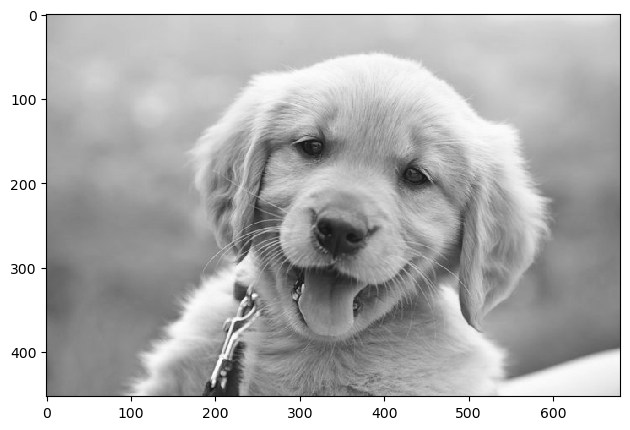

In [94]:
img = array(Image.open('res/puppy.jpg').convert(mode='L')) #to obtain grayscale image from RGB, need this since all operations need grayscale input
show_img(img)

Shape: (453, 680)


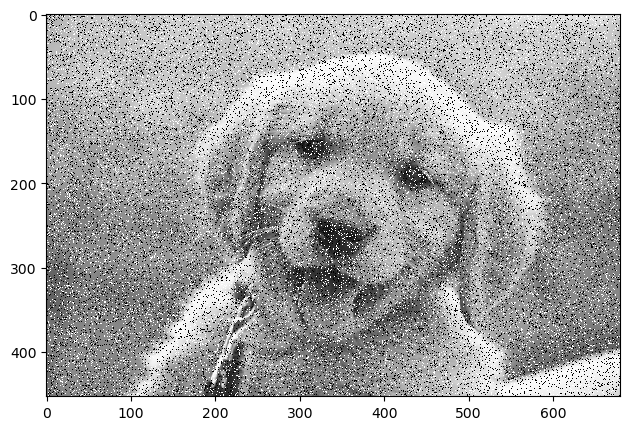

In [61]:
#add noise to the image
img_sp_noise = skimage.util.random_noise(img, mode = 's&p', seed = None, clip = True, amount = 0.18)
show_img(img_sp_noise)

Shape: (453, 680)


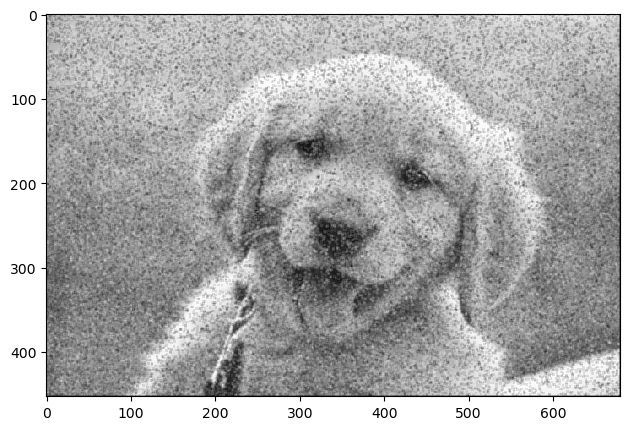

In [79]:
# make 3*3 box filter and convolve it with image for denoising
def box_filter(dim):
    return np.ones((dim, dim)) * 1 / dim ** 2

img_denoised_box_conv = signal.convolve2d(
    img_sp_noise, 
    box_filter(3), 
    mode="same")
#.astype(np.uint8)

show_img(img_denoised_box_conv)

Shape: (453, 680)


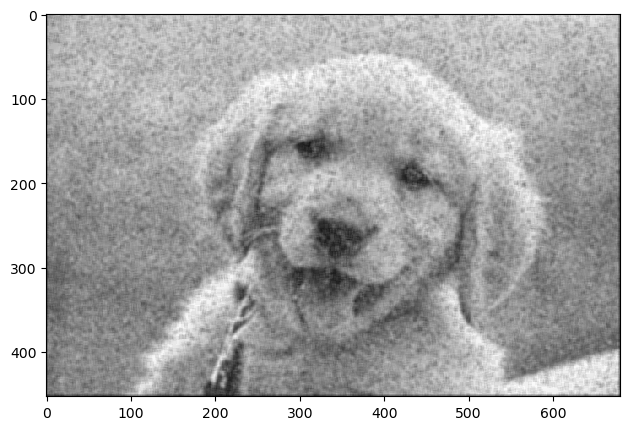

In [78]:
# Average filter

img_denoised_box_conv = signal.correlate2d(
    img_sp_noise, 
    box_filter(5), 
    mode="same")
#.astype(np.uint8)

show_img(img_denoised_box_conv)

Shape: (453, 680)


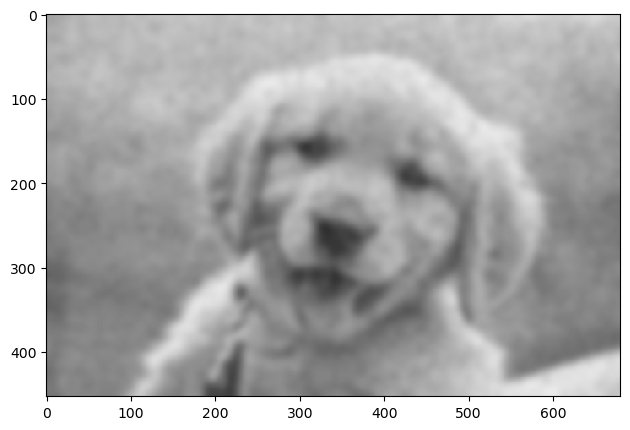

In [77]:
# Gaussian Smoothing on the image
smoothed_gaussian = gaussian_filter(img_sp_noise, sigma = 5)
show_img(smoothed_gaussian)

Shape: (453, 680)


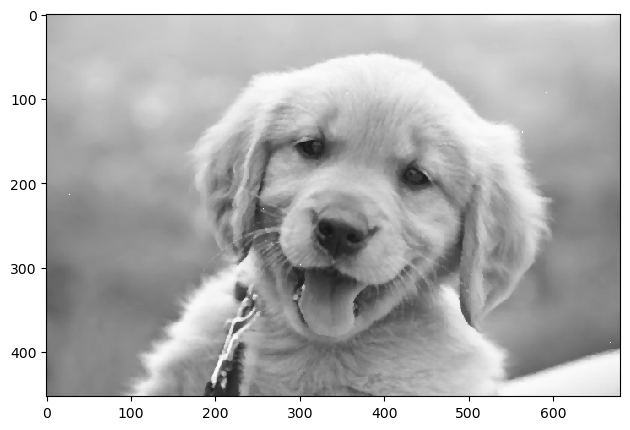

In [85]:
# Median Smoothing on the image
smoothed_median = median_filter(img_sp_noise, size = (4, 4))
show_img(smoothed_median)

### Points to explore:

1. Vary the size of the box - the bigger the box, the more denoising but you increase the blurriness
2. Yes you get the same image. Why? The filter is symmetric so the output doesn't change no matter the order
3. Median filter works the best.

## 1.2 Edge Detection

In [106]:
simple_edge_filter = np.array([[-1, 0, 1]]).T

Shape: (453, 680)


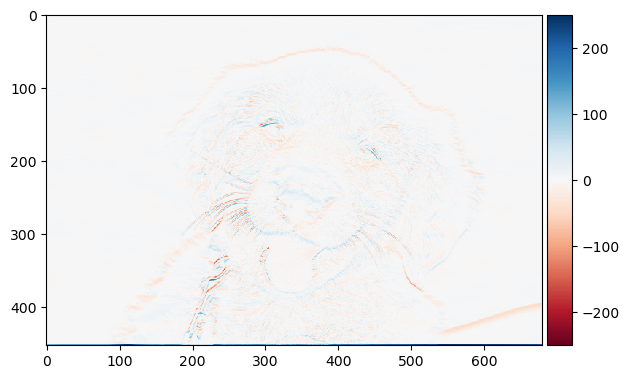

In [107]:
img_simple_edge_detect = signal.convolve2d(
    img, 
    simple_edge_filter, 
    mode="same")
show_img(img_simple_edge_detect)

Shape: (453, 680)


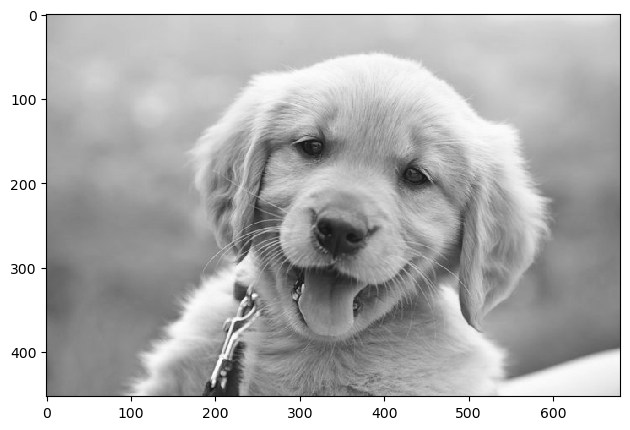

In [96]:
show_img(img)